In [22]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import cic_stats, cic_stats_jk
from scipy import spatial

r = 800
lbox = 205000
nran = 13333606
seed = 8182379
np.random.seed(seed)
ranpos = float(lbox)*np.random.rand(nran,3)

##########
# Diluir
##########
# ngxs=0.01
# np.random.seed(0)
# ids = np.random.choice(len(ranpos),size=int(len(ranpos)*ngxs))
# ranpos = ranpos[ids]
# nran = len(ranpos)

#ran_tree = spatial.cKDTree(ranpos)
print('N_tot = ',nran)
print('Mean interparticle distance:',(lbox**3/nran)**(1/3))
print('Wigner-Seitz radius:',(3*lbox**3/(4*np.pi*nran))**(1/3))
print('Testing radius:',r)


N_tot =  13333606
Mean interparticle distance: 864.5125888803159
Wigner-Seitz radius: 536.3008089006152
Testing radius: 800


In [25]:

#ns = np.geomspace(100,1000000,25).astype(int)
ns = np.geomspace(100,1000000,5).astype(int)

P0 = np.zeros(len(ns))
N_mean = np.zeros(len(ns))
xi_mean = np.zeros(len(ns))
chi = np.zeros(len(ns))
NXi = np.zeros(len(ns))
chi_std = np.zeros(len(ns))
NXi_std = np.zeros(len(ns))
P0_std = np.zeros(len(ns))
N_mean_std = np.zeros(len(ns))
xi_mean_std = np.zeros(len(ns))



#
#-----------
# Replicate box edges periodically
#-----------
#
from cicTools import perrep
from astropy.io import ascii
from astropy.table import Table
print('Replicating box:')
gxs = Table(ranpos,names=['x','y','z'])
newgxs = perrep(gxs,lbox,r)
print(f'Num of original gxs in box: {len(gxs)}\n\
Num of gxs after replication: {len(newgxs)}')
newgxs1=np.column_stack([newgxs['x'].data,newgxs['y'].data,newgxs['z'].data])
print(gxs.as_array()[0])
print(newgxs1[0])
ran_tree = spatial.cKDTree(newgxs1)

for i,n in enumerate(ns):
    #chi[i], NXi[i], P0[i], N_mean[i], xi_mean[i] = cic_stats(ran_tree, n, r, lbox)
    chi[i], NXi[i], P0[i], N_mean[i], xi_mean[i], \
            chi_std[i], NXi_std[i], P0_std[i], N_mean_std[i], xi_mean_std[i] = cic_stats_jk(ran_tree, n, r, lbox, jkbins=3)


#namefile = '../data/stability_randoms.npz'
#np.savez(namefile,chi,NXi,P0,N_mean,xi_mean,ns)

namefile = '../data/stability_randoms_jk.npz'

np.savez(namefile,chi, NXi, P0, N_mean, xi_mean, \
    chi_std, NXi_std, P0_std, N_mean_std,xi_mean_std)


Replicating box:
Num of original gxs in box: 13333606
Num of gxs after replication: 13648105
(46315.29666914, 156890.3694067, 148184.75205703)
[ 46315.29666914 156890.3694067  148184.75205703]


[0.02888889 0.02814815 0.03558148 0.0357763  0.03584107] [    100    1000   10000  100000 1000000]


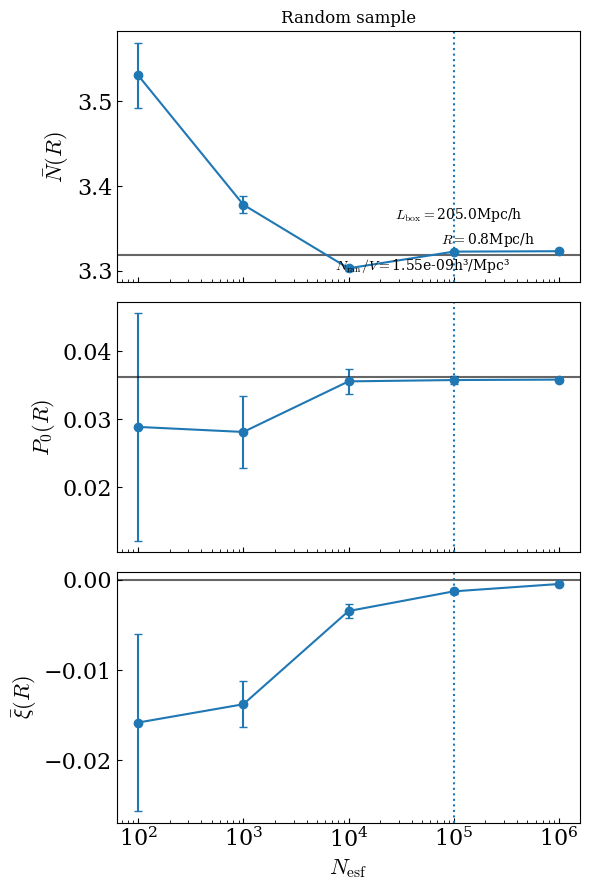

In [26]:
#
#plots con JK
#
import matplotlib.pyplot as plt

from cicTools import delta_P0

r = 800
lbox = 205000
nran = 13333606

namefile = f'../data/stability_randoms_jk.npz'
stats = np.load(namefile)

chi = stats['arr_0']
NXi = stats['arr_1']
P0 = stats['arr_2']
N_mean = stats['arr_3']
xi_mean = stats['arr_4']
chi_std = stats['arr_5']
NXi_std = stats['arr_6']
P0_std = stats['arr_7']
N_mean_std = stats['arr_8']
xi_mean_std = stats['arr_9']
#ns = np.geomspace(10,1000000,30).astype(int)

P0err = delta_P0(P0,ns)
print(P0,ns)

fs = 16
ms = 8
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

fig= plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.get_shared_x_axes().join(ax1, ax2, ax3)

"""
Nmean
"""
N_mean_analytical = nran*(4*np.pi*r**3/3)/(lbox)**3
ax1.axhline(N_mean_analytical,color='k',alpha=.6)
ax1.axvline(1e5,ls=':')


ax1.errorbar(ns,N_mean,yerr=N_mean_std,marker='o',capsize=3)
#ax1.plot(ns,N_mean)

xtextoffset=-.09
# ax1.text(.61+xtextoffset,.3,r'$L_\mathrm{box}=$'+f'{lbox/1000.}Mpc/h', \
#          transform=ax1.transAxes)
# ax1.text(.565+xtextoffset,.2,r'$N_\mathrm{ran}/V=$'+f'{nran/lbox**3:.2e}'+\
#          'h\u00b3/Mpc\u00b3', \
#          transform=ax1.transAxes)
# ax1.text(.66+xtextoffset,.1,r'$R=$'+f'{r/1000.}'+'Mpc/h', \
#          transform=ax1.transAxes)
ax1.text(.6,.25,r'$L_\mathrm{box}=$'+f'{lbox/1000.}Mpc/h', \
         transform=ax1.transAxes)
ax1.text(.7,.15,r'$R=$'+f'{r/1000.}'+'Mpc/h', \
         transform=ax1.transAxes)
ax1.text(.47,.05,r'$N_\mathrm{ran}/V=$'+f'{nran/lbox**3:.2e}'+\
         'h\u00b3/Mpc\u00b3', \
         transform=ax1.transAxes)

ax1.set_ylabel(r'$\bar{N}(R)$',fontsize=fs)
ax1.set_xscale('log')

"""
P0
"""
P0_ran = np.exp(-(nran/lbox**3)*(4./3.)*np.pi*r**3) #theoretical value of P0 for poisson dist.
ax2.errorbar(ns,P0,yerr=P0err,marker='o',capsize=3)
ax2.axhline(P0_ran,color='k',alpha=.6)
ax2.axvline(1e5,ls=':')

ax2.set_ylabel(r'$P_0(R)$',fontsize=fs)
ax2.set_xscale('log')

"""
Xi_mean
"""
ax3.errorbar(ns,xi_mean,yerr=xi_mean_std,marker='o',capsize=3)

ax3.axhline(0,color='k',alpha=.6)
ax3.axvline(1e5,ls=':')

ax3.set_xlabel(r'$N_\mathrm{esf}$',fontsize=fs)
ax3.set_ylabel(r'$\bar{\xi}(R)$',fontsize=fs)
ax3.set_xscale('log')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_title('Random sample')
plt.tight_layout()
#plt.savefig('../plots/stability_randoms_jk.png')
#plt.savefig('../plots/stability_randoms_jk.pdf')
plt.show()
